## Main Library

In [1]:
# Reading Data & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing & Encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Building Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb

In [2]:
# Reading Data
data = pd.read_csv(r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Telco-Customer-Churn\Telco_Customer_Churn.csv")

data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data = data.drop(columns="customerID", axis=1)

In [4]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
for col in data.columns:
    print(col , data[col].unique())
    print("-" *100)

gender ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen [0 1]
----------------------------------------------------------------------------------------------------
Partner ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents ['No' 'Yes']
----------------------------------------------------------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------------------------------------------------------------------
PhoneService ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
-

In [6]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### data is Cleaning (not have null value)

### Data Preprocessing

In [7]:
group_dsl = data[data["InternetService" ] =="DSL"]
group_viper = data[data["InternetService" ] == "Fiber optic"]
group_no = data[data["InternetService" ] == "No"]


print(group_dsl.shape, group_viper.shape, group_no.shape)

(2421, 20) (3096, 20) (1526, 20)


In [8]:
# PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
#  'Credit card (automatic)']


group_ele = data[data["PaymentMethod" ] =="Electronic check"]
group_mail = data[data["PaymentMethod" ] == "Mailed check"]
group_bank = data[data["PaymentMethod" ] == "Bank transfer (automatic)"]
group_credit = data[data["PaymentMethod" ] == "Credit card (automatic)"]

print(group_ele.shape, group_credit.shape, group_bank.shape, group_mail.shape)

(2365, 20) (1522, 20) (1544, 20) (1612, 20)


In [9]:
# data["TotalCharges"] = data["TotalCharges"].astype("float32")

### Make Encoder

In [10]:
obj_col = data.select_dtypes(include=["object"])

for col in obj_col.columns:
    if col == "InternetService":
        x = data[col].unique()
        y = data[col].values
        new_col = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()
        for i, j in enumerate(x):
            data[x] = new_col[i]

        data.drop(columns=col, axis=1, inplace=True)
    else:
        data[col] = LabelEncoder().fit_transform(data[col])

In [11]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No
0,0,0,1,0,1,0,1,0,2,0,...,0,0,1,2,29.85,2505,0,1.0,0.0,0.0
1,1,0,0,0,34,1,0,2,0,2,...,0,1,0,3,56.95,1466,0,1.0,0.0,0.0
2,1,0,0,0,2,1,0,2,2,0,...,0,0,1,3,53.85,157,1,1.0,0.0,0.0
3,1,0,0,0,45,0,1,2,0,2,...,0,1,0,0,42.30,1400,0,1.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,2,70.70,925,1,1.0,0.0,0.0
5,0,0,0,0,8,1,2,0,0,2,...,2,0,1,2,99.65,6104,1,1.0,0.0,0.0
6,1,0,0,1,22,1,2,0,2,0,...,0,0,1,1,89.10,1550,0,1.0,0.0,0.0
7,0,0,0,0,10,0,1,2,0,0,...,0,0,0,3,29.75,2609,0,1.0,0.0,0.0
8,0,0,1,0,28,1,2,0,0,2,...,2,0,1,2,104.80,2646,1,1.0,0.0,0.0
9,1,0,0,1,62,1,0,2,2,0,...,0,1,0,0,56.15,3022,0,1.0,0.0,0.0


### Data Visualization

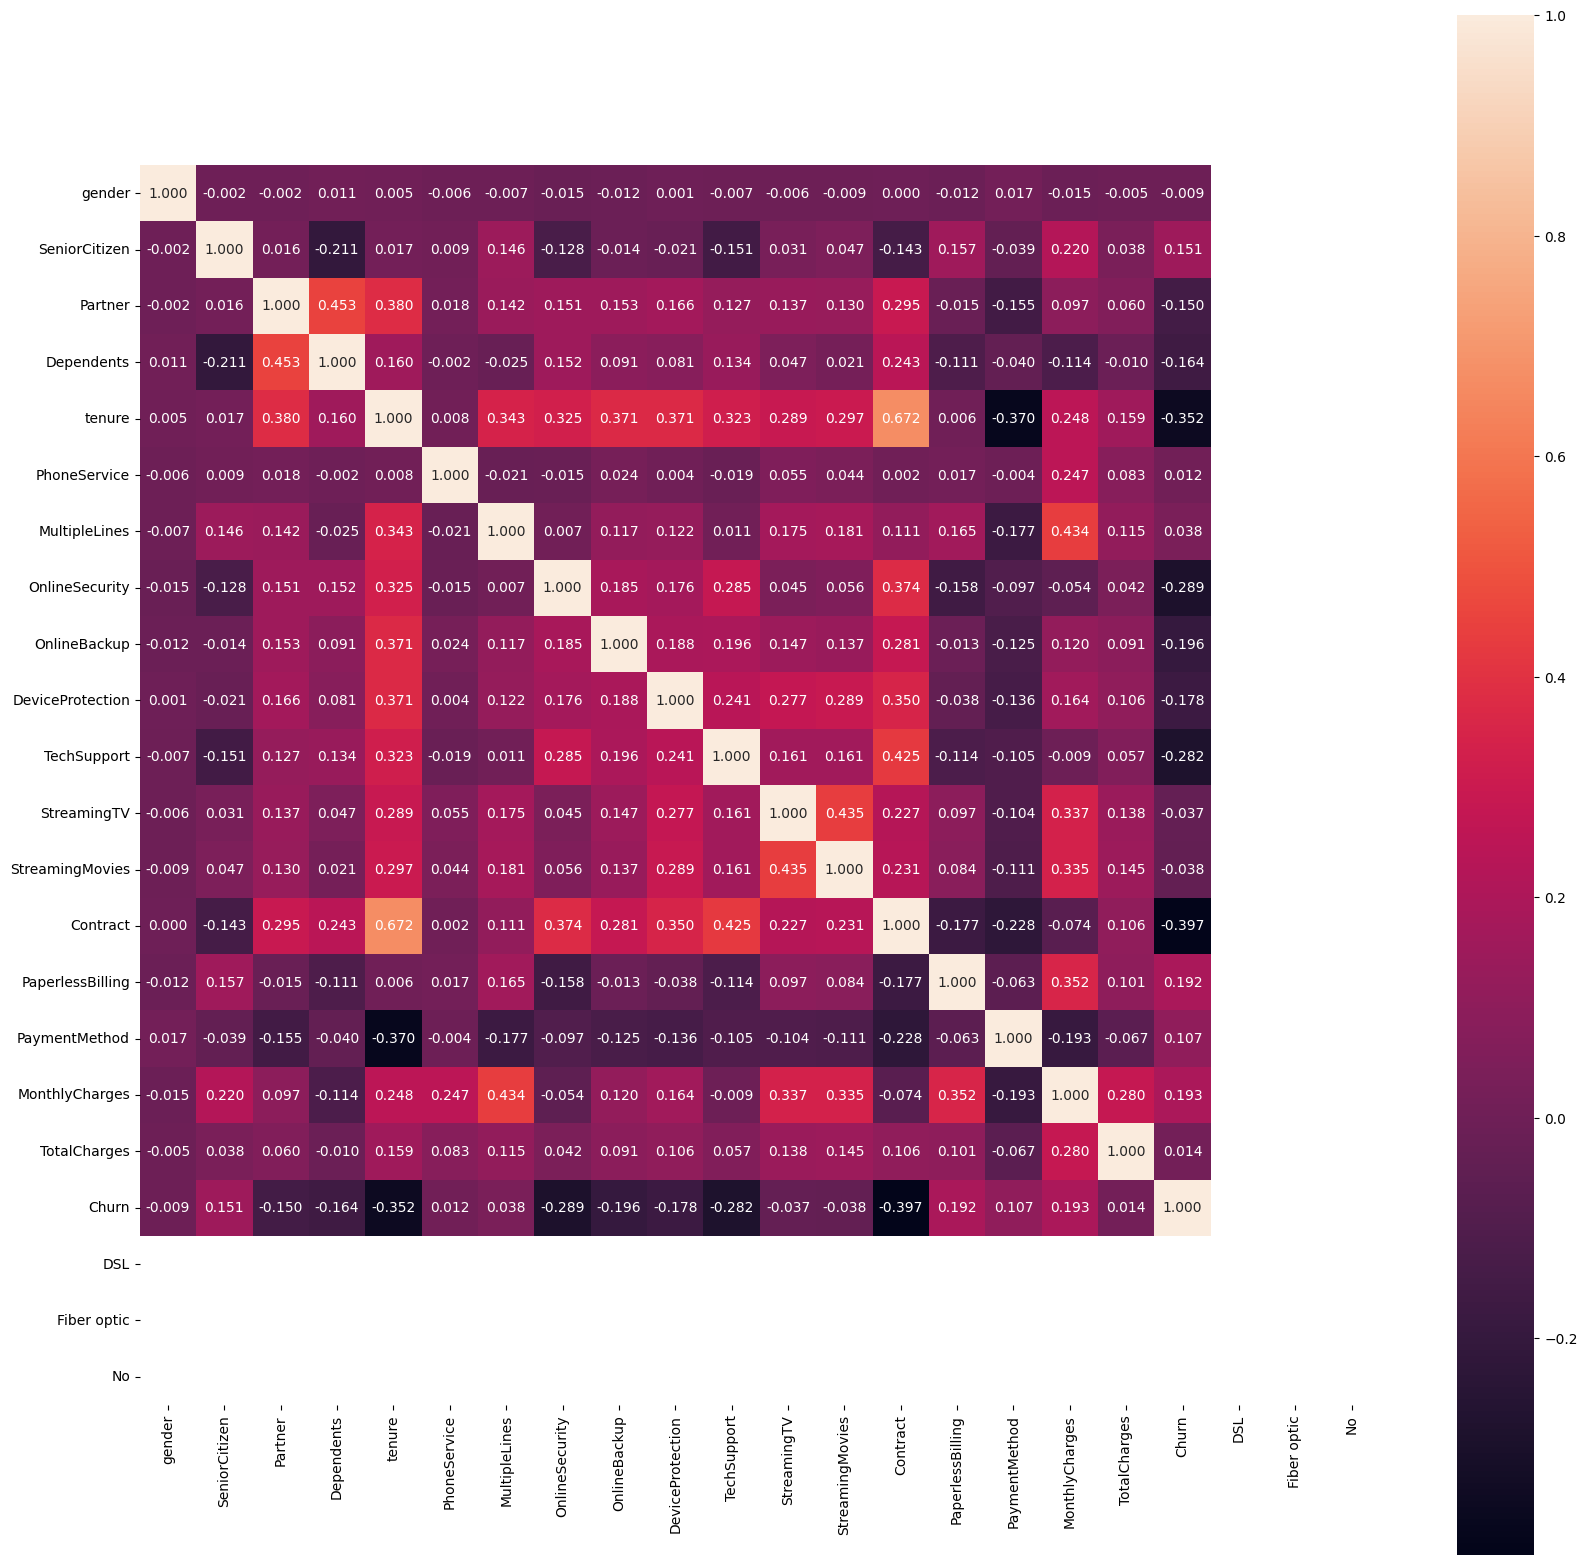

In [12]:
plt.figure(figsize=(20, 20))

sns.heatmap(data.corr(), annot=True, square=True, fmt="0.3f")
plt.show()

<Figure size 500x500 with 0 Axes>

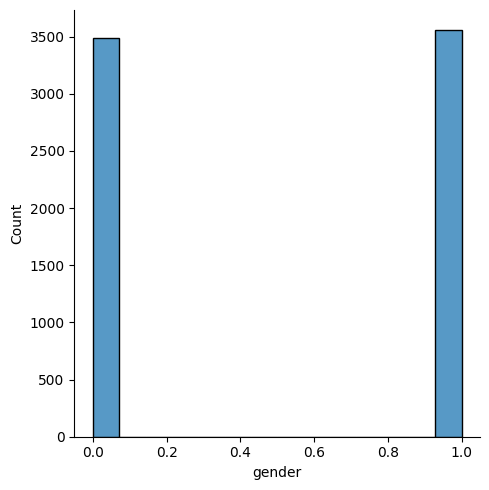

<Figure size 500x500 with 0 Axes>

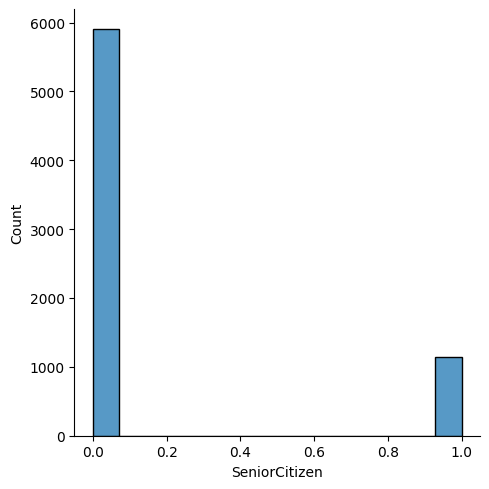

<Figure size 500x500 with 0 Axes>

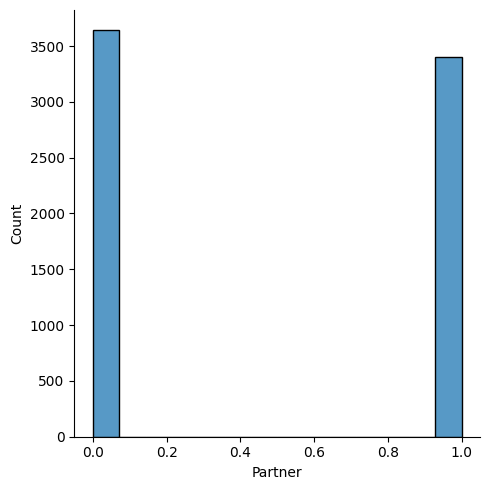

<Figure size 500x500 with 0 Axes>

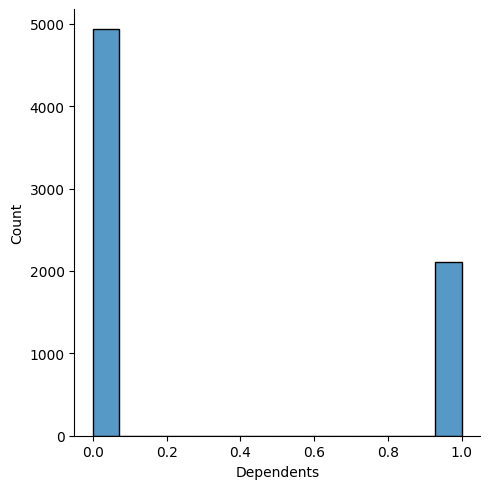

<Figure size 500x500 with 0 Axes>

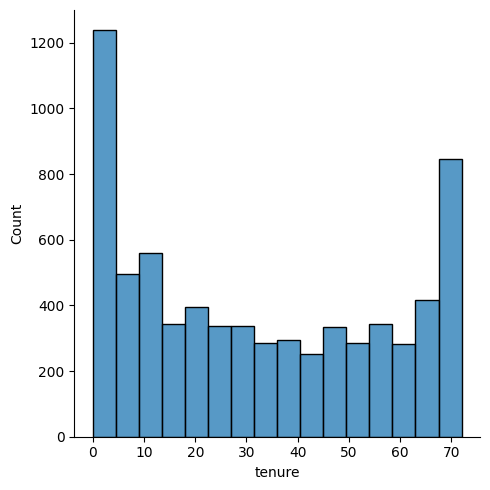

<Figure size 500x500 with 0 Axes>

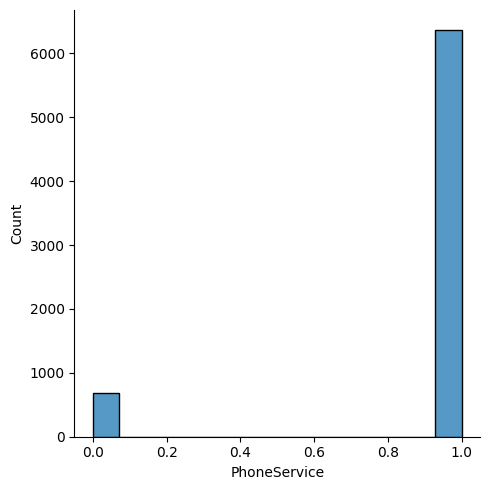

<Figure size 500x500 with 0 Axes>

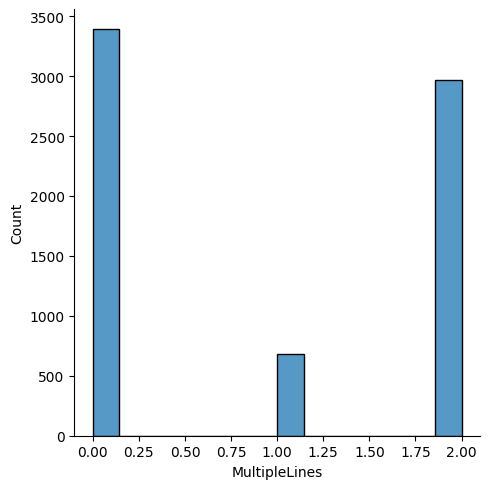

<Figure size 500x500 with 0 Axes>

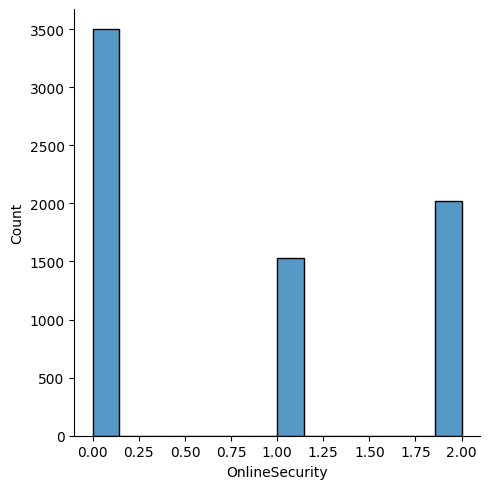

<Figure size 500x500 with 0 Axes>

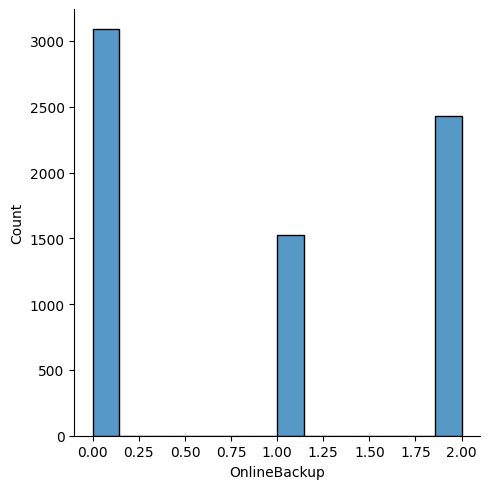

<Figure size 500x500 with 0 Axes>

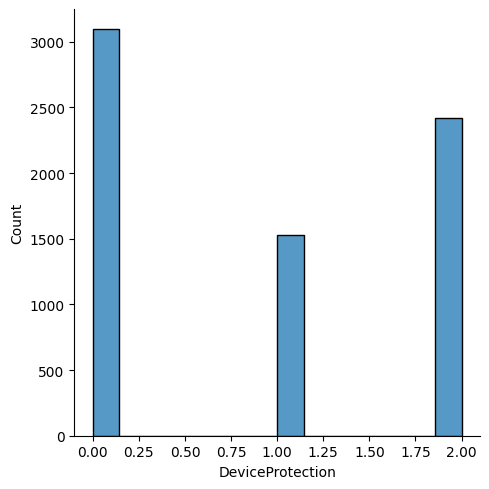

<Figure size 500x500 with 0 Axes>

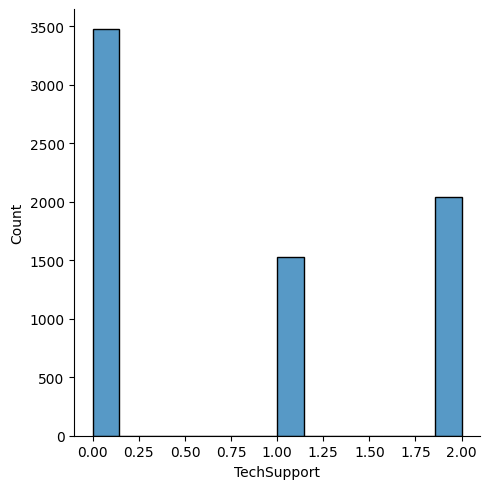

<Figure size 500x500 with 0 Axes>

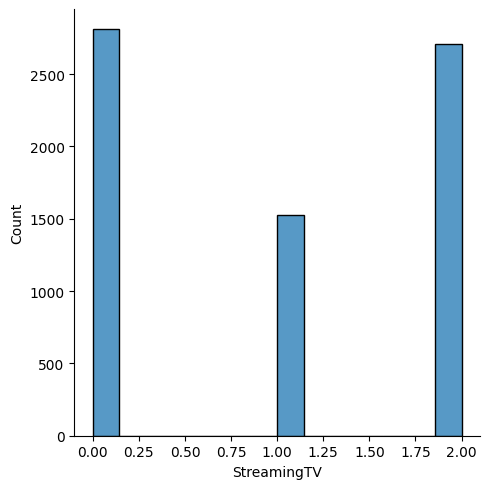

<Figure size 500x500 with 0 Axes>

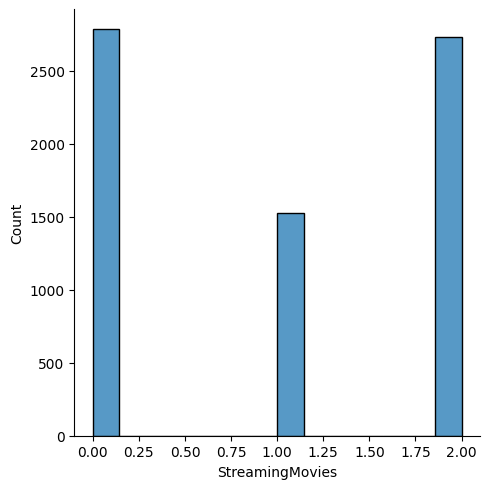

<Figure size 500x500 with 0 Axes>

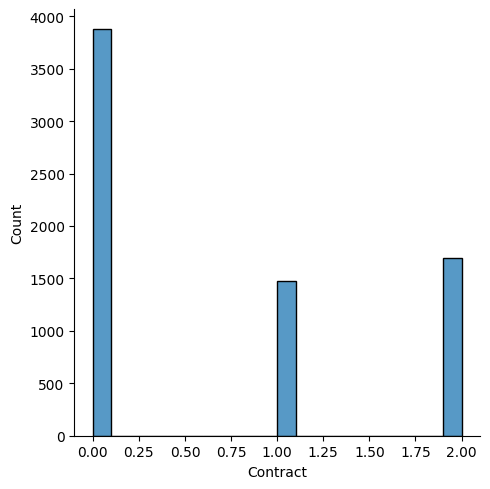

<Figure size 500x500 with 0 Axes>

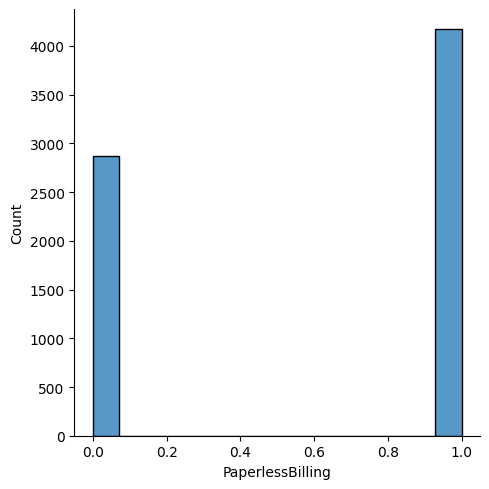

<Figure size 500x500 with 0 Axes>

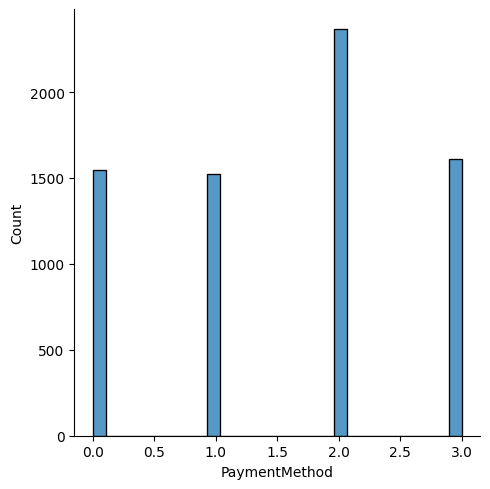

<Figure size 500x500 with 0 Axes>

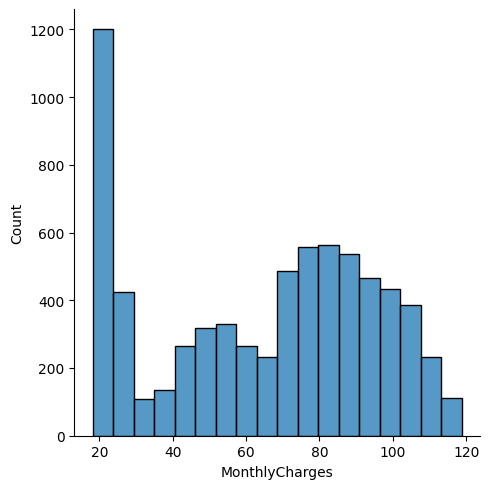

<Figure size 500x500 with 0 Axes>

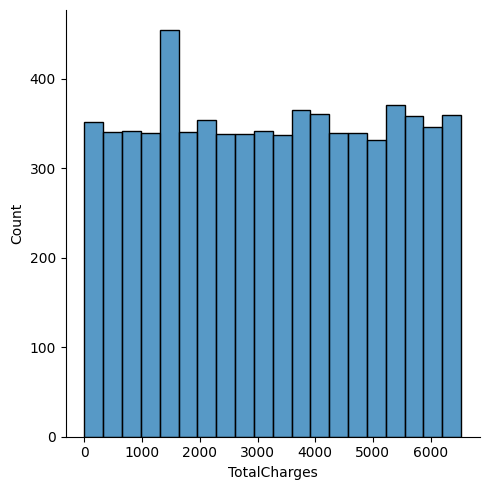

<Figure size 500x500 with 0 Axes>

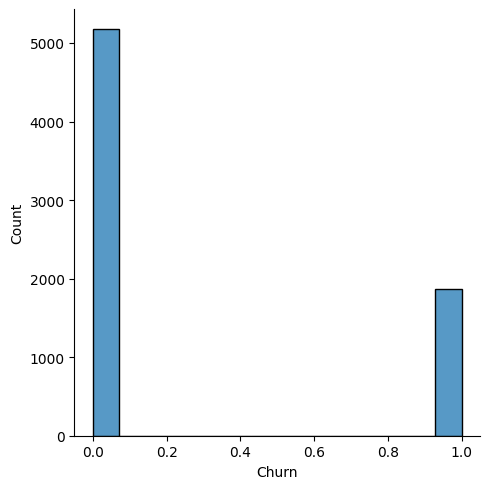

In [13]:
for col in data.columns[ :-3]:
    plt.figure(figsize=(5, 5))
    sns.displot(data[col])
    plt.show()

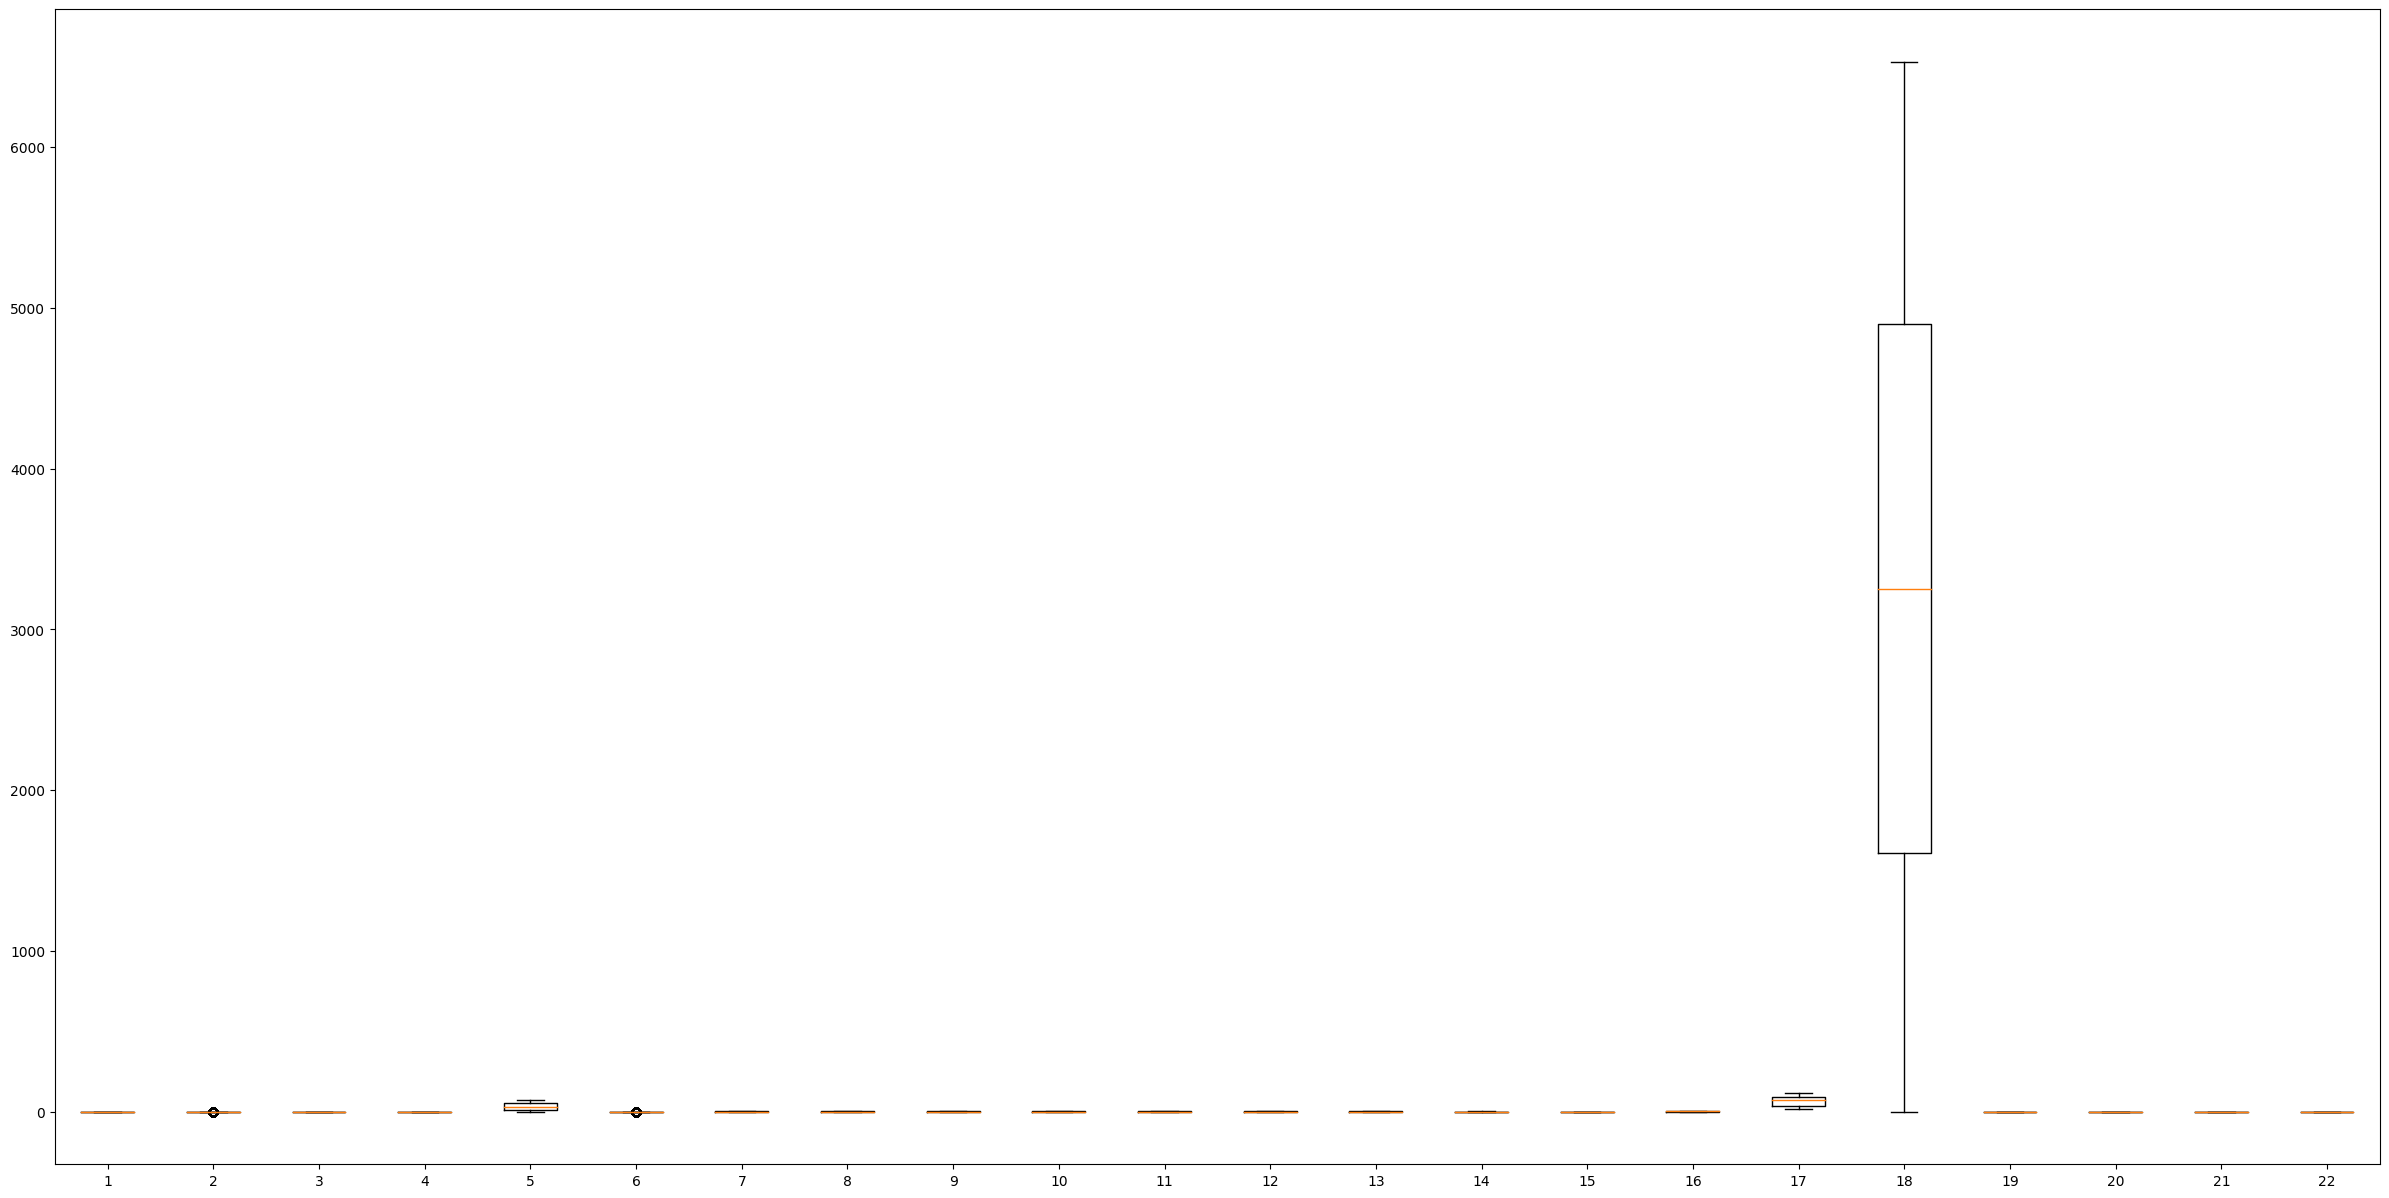

In [16]:
plt.figure(figsize=(30, 15))

plt.boxplot(data)
plt.show()

#### Data No Have Outliar And 
#### All most Columns Value Count Are Very Similarity

## Correlation Between Feature and Target not Good

# Make Feature Eng

#### Make Over Sampling ==> DAta

In [17]:
print(data[data["Churn"] == 0].shape, data[data["Churn"] == 1].shape)

(5174, 22) (1869, 22)


In [18]:
x_input = data.drop(columns="Churn", axis=1)
y_output = data["Churn"]

new_x, new_y = SMOTE().fit_resample(x_input, y_output)

In [19]:
data = pd.DataFrame(pd.concat([new_x, new_y], axis=1))

In [20]:
print(data[data["Churn"] == 0].shape, data[data["Churn"] == 1].shape)

(5174, 22) (5174, 22)


In [21]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DSL,Fiber optic,No,Churn
0,0,0,1,0,1,0,1,0,2,0,...,0,0,1,2,29.85,2505,1.0,0.0,0.0,0
1,1,0,0,0,34,1,0,2,0,2,...,0,1,0,3,56.95,1466,1.0,0.0,0.0,0
2,1,0,0,0,2,1,0,2,2,0,...,0,0,1,3,53.85,157,1.0,0.0,0.0,1
3,1,0,0,0,45,0,1,2,0,2,...,0,1,0,0,42.30,1400,1.0,0.0,0.0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,2,70.70,925,1.0,0.0,0.0,1


## Splitting Data & Building Model

In [22]:
x_input = data.drop(columns="Churn", axis=1)
y_output = data["Churn"]

x_train, x_test, y_train, y_test = train_test_split(x_input, y_output, train_size=0.7, random_state=42)

In [23]:
y_output.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

##  ------ - - - - ------------------ - - - -- ---------------- - - -- ----------------------------------- - - -- ------------

## Model_1 ==> LogisticRegression

In [30]:
model_reg = LogisticRegression(max_iter=100000, C=5)
model_reg.fit(x_train, y_train)

print(f"The Accuracy Training Data is {model_reg.score(x_train, y_train)}")
print(f"The Accuracy Testing Data is {model_reg.score(x_test, y_test)}")

The Accuracy Training Data is 0.797045423167196
The Accuracy Testing Data is 0.8012882447665056


## Model_2 ==> AdaBoostClassifier


In [31]:
model_AD = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=200,
                                                               min_samples_split=10,
                                                               min_samples_leaf=10,
                                                               max_features=5),
                         
                             n_estimators=2000,
                             learning_rate=0.0000001)

model_AD.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_AD.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_AD.score(x_test, y_test)}")

The predict Score Train is ==> 0.9192323622808228
%----------------------------------------------------------%
The predict Score Test is ==> 0.8473429951690822


## Model_3 ==> XGBClassifie

In [32]:
model_xgb = xgb.XGBClassifier(n_estimators=100, max_depth=1)
                             
model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train is ==> 0.8177550738644208
%----------------------------------------------------------%
The predict Score Test is ==> 0.822866344605475
